In [ ]:
# homework 7
# Jack Driscoll 

In [147]:
# problem 1.1
# using the battingDF, which players have the most homeruns (HR)
# in a season?  display the top 25.

import numpy as np
import pandas as pd 
pd.options.display.max_columns = 200

battingDF = pd.read_csv("Batting-Copy1.csv")
# max homeruns hit per player per season:
topHRperSeason = battingDF[["playerID","HR"]].sort_values("HR",ascending=False).head(25)
# total homeruns hit per player per carreer(Total):
totalTopHRDF = battingDF.groupby("playerID").agg({"HR":sum}).sort_values("HR",ascending=False).head(25)
battingDF.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [148]:
# 1.1
# Can we do both in one line?
battingDF.groupby("playerID").agg({"HR":[sum,max]}).sort_values(("HR","sum"),ascending=False).head(25)

HR    
           sum max
playerID          
bondsba01  762  73
aaronha01  755  47
ruthba01   714  60
rodrial01  696  57
mayswi01   660  52
griffke02  630  56
thomeji01  612  52
sosasa01   609  66
pujolal01  591  49
robinfr02  586  49
mcgwima01  583  70
killeha01  573  49
palmera01  569  47
jacksre01  563  47
ramirma02  555  45
schmimi01  548  48
ortizda01  541  54
mantlmi01  536  54
foxxji01   534  58
thomafr04  521  43
mccovwi01  521  45
willite01  521  43
bankser01  512  47
matheed01  512  47
ottme01    511  42

In [149]:
# 1.2
# which players have had the most hit-by-pitches (HBP) in a season?  
# display the top 10.
battingDF.groupby("playerID").agg({"HBP":max}).sort_values("HBP", ascending=False ).head(10)
battingDF[["playerID","HBP"]].sort_values("HBP",ascending=False).head(10)
# Two ways to do it, one using groupby method and one not. groupby is cleaner in IMO

,playerID,HBP
6801,jennihu01,51.0
49476,huntro01,50.0
7384,jennihu01,46.0
7090,jennihu01,46.0
7433,mcganda01,39.0
5444,welchcu01,36.0
63287,baylodo01,35.0
75494,biggicr01,34.0
4451,tucketo01,33.0
5024,welchcu01,32.0


In [150]:
# 1.3
# which players have grounded into double plays (GIDP) the most
# in a season? display the top 10.

# groupby is cleaner, avoids sus row names
battingDF.groupby("playerID").agg({"GIDP":max}).sort_values("GIDP",ascending=False).head(10)

,GIDP
playerID,
riceji01,36.0
jenseja01,32.0
butlebi03,32.0
grievbe01,32.0
ripkeca01,32.0
tejadmi01,32.0
mcgehca01,31.0
rodriiv01,31.0
armasto01,31.0


In [151]:
# 2.0
# problem 2 (crosstabs)
# using the gamelogsDF, make a crosstab that calculates 
# the number of games each home team has played by time of day

gameLogsDF = pd.read_csv("GL2016-Copy1.TXT",header=None)


#for i in range(0,161,10):
    #print(gameLogsDF.loc[0:10,i:i+10])
    
# ^^ this commented for loop helped me visualize the entire dataset    
# looks like column 12 consists of n/d values 
# Looks like column 6 consists of where the game was played

pd.crosstab(gameLogsDF[6],gameLogsDF[12])

12,D,N
6,,
ANA,17,64
ARI,21,60
ATL,21,60
BAL,19,62
BOS,24,57
CHA,28,53
CHN,45,36
CIN,31,50
CLE,26,55


In [152]:
2.1
# make a crosstab that calculates the average attendance by
# home team and time of day. you'll need to use the
# "values" and "aggfunc" options as we did in class.

# looks like column with attendance is column 17
# we will create a new dataFrame with the same crosstab, but the values will be the average attendance per stadium
avgAttendanceByTime = pd.crosstab(gameLogsDF[6],gameLogsDF[12],values=gameLogsDF[17],aggfunc=np.mean)

# Then we will do some fun math to get the general attendance data for day times vs night times
print("Day time attendance AVG: (league total) "+str(avgAttendanceByTime["D"].sum(axis=0)/len(avgAttendanceByTime)))
print("Night time attendance AVG (league total) "+str(avgAttendanceByTime["N"].sum(axis=0)/len(avgAttendanceByTime)))
avgAttendanceByTime

Day time attendance AVG: (league total) 31863.65987560014
Night time attendance AVG (league total) 29288.49169617174


12,D,N
6,,
ANA,36535.352941,37422.515625
ARI,24083.761905,25507.616667
ATL,28478.857143,23714.300000
BAL,33935.684211,24638.161290
BOS,36955.875000,36289.350877
CHA,23600.642857,20480.660377
CHN,40201.688889,39537.333333
CIN,26093.483871,21703.740000
CLE,21530.346154,18761.418182


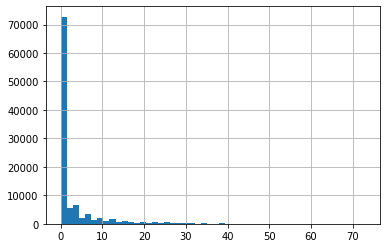

In [153]:
# 3.0 
# problem 3 (plots)

# using the battingDF, create a histogram of homeruns
# use bins=50
len(battingDF)
battingDF["HR"].hist(bins=50)

# what does the histogram tell you?
# This histogram tells me that it is extremley rare for players to hit more than 5 homeruns in a season.
# It tells me that most players hit 0 to very few home runs. 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002847699E948>]],
      dtype=object)

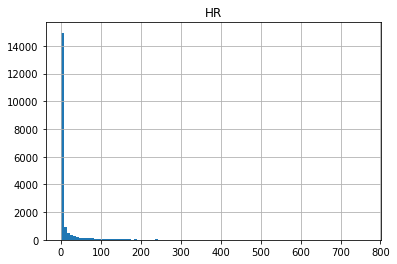

In [154]:
# 3.1
# can we make a histogram of the players most career homeruns 
# Do we expect it to be the same shape just bigger numbers?
battingDF.groupby("playerID").agg({"HR":sum}).hist(bins=100)

In [155]:
# problem 4 (filtering)

# using the gamelogsDF, find all games where attendance
# exceeded 50,000

# I use the loc function to find rows where values in column 17 are greater than 50000.

bigAttendGamesDF = gameLogsDF.sort_values(17,ascending=False).loc[gameLogsDF[17]>=50000]
print("There were total {0} total game(s) where attendance exceeded 50,000".format(len(gameLogsDF.sort_values(17,ascending=False).loc[gameLogsDF[17]>=50000])))
bigAttendGamesDF

There were total 14 total game(s) where attendance exceeded 50,000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
2257,20160920,0,Tue,SFN,NL,151,LAN,NL,151,2,0,54,N,NaN,NaN,NaN,LOS03,53621,216,000010001,000000000,36,11,0,0,2,2,0,0,0,2,1,10,0,1,0,0,9,4,0,0,0,0,27,7,1,0,1,0,35,9,1,0,0,0,0,0,0,2,0,13,0,0,1,0,10,7,2,2,0,0,27,8,0,0,0,0,culbf901,Fieldin Culbreth,gonzm901,Manny Gonzalez,buckc901,CB Bucknor,reynj901,Jim Reynolds,NaN,(none),NaN,(none),bochb002,Bruce Bochy,robed001,Dave Roberts,cuetj001,Johnny Cueto,hillr001,Rich Hill,romos001,Sergio Romo,nunee002,Eduardo Nunez,cuetj001,Johnny Cueto,hillr001,Rich Hill,nunee002,Eduardo Nunez,5,herng001,Gorkys Hernandez,8,poseb001,Buster Posey,2,pench001,Hunter Pence,9,willm008,Mac Williamson,7,crawb001,Brandon Crawford,6,beltb001,Brandon Belt,3,adrie001,Ehire Adrianza,4,cuetj001,Johnny Cueto,1,utlec001,Chase Utley,4,seagc001,Corey Seager,6,turnj001,Justin Turner,5,gonza003,Adrian Gonzalez,3,grany001,Yasmani Grandal,2,reddj001,Josh Reddick,9,tolea001,Andrew Toles,7,pedej001,Joc Pederson,8,hillr001,Rich Hill,1,NaN,Y
145,20160415,0,Fri,SFN,NL,11,LAN,NL,11,3,7,51,N,NaN,NaN,NaN,LOS03,53449,165,001002000,10140100x,33,5,0,0,0,1,0,0,0,0,0,9,0,0,0,0,3,4,4,4,0,0,24,8,3,0,1,0,35,9,2,1,2,7,0,0,0,2,0,11,0,0,1,0,6,3,2,2,2,0,27,10,1,0,0,0,rackd901,David Rackley,vanol901,Larry Vanover,marqa901,Alfonso Marquez,guccc901,Chris Guccione,NaN,(none),NaN,(none),bochb002,Bruce Bochy,robed001,Dave Roberts,kersc001,Clayton Kershaw,bumgm001,Madison Bumgarner,NaN,(none),herne001,Enrique Hernandez,bumgm001,Madison Bumgarner,kersc001,Clayton Kershaw,pagaa001,Angel Pagan,7,panij002,Joe Panik,4,poseb001,Buster Posey,2,pench001,Hunter Pence,9,beltb001,Brandon Belt,3,duffm002,Matt Duffy,5,tomlk001,Kelby Tomlinson,6,bumgm001,Madison Bumgarner,1,blang001,Gregor Blanco,8,herne001,Enrique Hernandez,7,puigy001,Yasiel Puig,9,gonza003,Adrian Gonzalez,3,turnj001,Justin Turner,5,kendh001,Howie Kendrick,4,thomt002,Trayce Thompson,8,ellia001,A.J. Ellis,2,culbc001,Charlie Culberson,6,kersc001,Clayton Kershaw,1,NaN,Y
160,20160416,0,Sat,SFN,NL,12,LAN,NL,12,4,3,54,N,NaN,NaN,NaN,LOS03,53409,212,100120000,000000120,33,8,1,0,0,3,0,0,1,6,2,7,1,1,1,0,9,5,3,3,0,0,27,10,0,0,0,0,32,5,3,0,1,3,0,0,0,3,0,8,0,0,0,0,5,5,4,4,2,0,27,8,0,0,1,0,vanol901,Larry Vanover,marqa901,Alfonso Marquez,guccc901,Chris Guccione,rackd901,David Rackley,NaN,(none),NaN,(none),bochb002,Bruce Bochy,robed001,Dave Roberts,cuetj001,Johnny Cueto,kazms001,Scott Kazmir,garcj002,Santiago Casilla,panij002,Joe Panik,cuetj001,Johnny Cueto,kazms001,Scott Kazmir,spand001,Denard Span,8,panij002,Joe Panik,4,poseb001,Buster Posey,2,pench001,Hunter Pence,9,beltb001,Brandon Belt,3,duffm002,Matt Duffy,5,crawb001,Brandon Crawford,6,cuetj001,Johnny Cueto,1,pagaa001,Angel Pagan,7,utlec001,Chase Utley,4,seagc001,Corey Seager,6,turnj001,Justin Turner,5,gonza003,Adrian Gonzalez,3,grany001,Yasmani Grandal,2,herne001,Enrique Hernandez,7,pedej001,Joc Pederson,8,thomt002,Trayce Thompson,9,kazms001,Scott Kazmir,1,NaN,Y
2312,20160924,0,Sat,COL,NL,155,LAN,NL,155,1,14,51,N,NaN,NaN,NaN,LOS03,53299,184,000000010,04021160x,32,6,1,0,1,1,0,0,0,0,0,8,0,0,0,0,4,4,8,6,0,0,24,10,3,0,0,0,36,13,1,0,1,13,2,0,1,8,1,7,1,0,0,0,9,3,1,1,0,0,27,7,0,0,0,0,rackd901,David Rackley,rippm901,Mark Ripperger,marqa901,Alfonso Marquez,vanol901,Larry Vanover,NaN,(none),NaN,(none),weisw001,Walt Weiss,robed001,Dave Roberts,kersc001,Clayton Kershaw,bettc001,Chad Bettis,NaN,(none),pedej001,Joc Pederson,bettc001,Chad Bettis,kersc001,Clayton Kershaw,blacc001,Charlie Blackmon,8,descd001,Daniel Descalso,6,arenn001,Nolan Arena

In [156]:
# find all final home games of the season. 
# (there are 162 games in a season)
# don't really know where to start...  I think the question is asking about column 8, since that seems to have some correlation to the number 162
# In the limited solutions data, there is 
gameLogsDF.loc[gameLogsDF[8]==162]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
2413,20161002,0,Sun,HOU,AL,162,ANA,AL,162,1,8,51,D,NaN,NaN,NaN,ANA01,28083,162,000000010,04000310x,32,7,1,0,0,1,0,1,0,1,0,8,0,0,1,0,6,5,8,8,0,0,24,5,0,1,0,0,32,9,3,0,1,8,0,1,0,6,0,5,2,0,0,0,7,3,1,1,0,0,27,12,0,0,1,0,davib902,Bob Davidson,scotd901,Dale Scott,iassd901,Dan Iassogna,barrl901,Lance Barrett,NaN,(none),NaN,(none),hinca001,A.J. Hinch,sciom001,Mike Scioscia,chacj001,Jhoulys Chacin,rodgb001,Brady Rodgers,NaN,(none),orter001,Rafael Ortega,rodgb001,Brady Rodgers,chacj001,Jhoulys Chacin,sprig001,George Springer,9,kempt001,Tony Kemp,7,altuj001,Jose Altuve,10,whitt002,Tyler White,4,gonzm002,Marwin Gonzalez,6,reeda002,A.J. Reed,3,stasm001,Max Stassi,2,morac001,Colin Moran,5,marij002,Jake Marisnick,8,escoy001,Yunel Escobar,5,calhk001,Kole Calhoun,9,troum001,Mike Trout,10,cronc002,C.J. Cron,3,martj007,Jefry Marte,7,simma001,Andrelton Simmons,6,orter001,Rafael Ortega,8,perec003,Carlos Perez,2,pennc001,Cliff Pennington,4,NaN,Y
2414,20161002,0,Sun,TOR,AL,162,BOS,AL,162,2,1,54,D,NaN,NaN,NaN,BOS07,36787,194,000010010,000000100,34,9,2,0,1,2,0,0,0,4,0,6,0,0,2,0,9,4,1,1,0,0,27,11,0,0,1,0,30,4,0,0,1,1,0,0,1,3,0,8,1,0,1,0,6,6,2,2,0,0,27,9,1,0,2,0,guccc901,Chris Guccione,gormb901,Brian Gorman,carlm901,Mark Carlson,wolcq901,Quinn Wolcott,NaN,(none),NaN,(none),gibbj001,John Gibbons,farrj001,John Farrell,sanca006,Aaron Sanchez,ziegb001,Brad Ziegler,osunr001,Roberto Osuna,tulot001,Troy Tulowitzki,sanca006,Aaron Sanchez,pricd001,David Price,travd001,Devon Travis,4,donaj001,Josh Donaldson,5,encae001,Edwin Encarnacion,3,bautj002,Jose Bautista,10,martr004,Russell Martin,2,tulot001,Troy Tulowitzki,6,uptob001,Melvin Upton,7,pillk001,Kevin Pillar,8,carre001,Ezequiel Carrera,9,pedrd001,Dustin Pedroia,4,holtb002,Brock Holt,5,bettm001,Mookie Betts,9,ortid001,David Ortiz,10,ramih003,Hanley Ramirez,3,bogax001,Xander Bogaerts,6,bradj001,Jackie Bradley,8,leons001,Sandy Leon,2,benia002,Andrew Benintendi,7,NaN,Y
2415,20161002,0,Sun,MIN,AL,162,CHA,AL,162,6,3,54,D,NaN,NaN,NaN,CHI12,21904,181,104001000,001000110,35,9,2,0,2,6,0,1,1,4,0,11,0,0,0,0,8,5,3,3,0,0,27,8,0,0,0,0,33,6,2,0,0,3,0,0,1,4,0,9,0,0,0,0,8,4,6,6,0,0,27,10,0,0,0,0,lentn901,Nic Lentz,wendh902,Hunter Wendelstedt,gibsh902,Tripp Gibson,hobep901,Pat Hoberg,NaN,(none),NaN,(none),molip001,Paul Molitor,ventr001,Robin Ventura,berrj001,Jose Berrios,salec001,Chris Sale,kintb001,Brandon Kintzler,buxtb001,Byron Buxton,berrj001,Jose Berrios,salec001,Chris Sale,buxtb001,Byron Buxton,8,polaj001,Jorge Polanco,6,grosr001,Robbie Grossman,10,sanom001,Miguel Sano,5,vargk001,Kennys Vargas,3,keplm001,Max Kepler,9,escoe001,Eduardo Escobar,4,murpj001,John Ryan Murphy,2,schal001,Logan Schafer,7,eatoa002,Adam Eaton,9,andet001,Tim Anderson,6,cabrm002,Melky Cabrera,7,abrej003,Jose Abreu,3,mornj001,Justin Morneau,10,frazt001,Todd Frazier,5,avila001,Alex Avila,2,sancc001,Yolmer Sanchez,4,garcl004,Leury Garcia,8,NaN,Y
2416,20161002,0,Sun,CLE,AL,161,KCA,AL,162,3,2,54,D,NaN,NaN,NaN,KAN06,29475,146,002000010,100010000,30,4,2,0,1,3,0,1,2,2,0,6,0,0,0,0,5,3,2,2,0,0,27,15,0,0,1,0,31,6,2,0,1,2,0,0,0,1,0,5,0,1,1,0,3,3,3,3,0,0,27,4,0,0,0,0,millb901,Bill Miller,hicke901,Ed Hickox,gibsg901,Greg Gibson,estam901,Mike Estabrook,NaN,(none),NaN,(none),frant001,Terry Francona,yoste001,Ned Yost,tomlj001,Josh Tomlin,kenni001,Ian Kennedy,allec002,Cody Allen,lindf001,Francisco Lindor,tomlj001,Josh Tomlin,kenni001,Ian Kennedy,santc002,Carlos Santana,3,kipnj001,Jason Kipnis,4,lindf001,Francisco Lindor,6,napom001,Mike Napoli,10,

In [157]:
# alternate way of filtering to get only the 162 values in column 8
print(len(gameLogsDF.groupby(8).get_group(162)))
gameLogsDF.groupby(8).get_group(162)

14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
2413,20161002,0,Sun,HOU,AL,162,ANA,AL,162,1,8,51,D,NaN,NaN,NaN,ANA01,28083,162,000000010,04000310x,32,7,1,0,0,1,0,1,0,1,0,8,0,0,1,0,6,5,8,8,0,0,24,5,0,1,0,0,32,9,3,0,1,8,0,1,0,6,0,5,2,0,0,0,7,3,1,1,0,0,27,12,0,0,1,0,davib902,Bob Davidson,scotd901,Dale Scott,iassd901,Dan Iassogna,barrl901,Lance Barrett,NaN,(none),NaN,(none),hinca001,A.J. Hinch,sciom001,Mike Scioscia,chacj001,Jhoulys Chacin,rodgb001,Brady Rodgers,NaN,(none),orter001,Rafael Ortega,rodgb001,Brady Rodgers,chacj001,Jhoulys Chacin,sprig001,George Springer,9,kempt001,Tony Kemp,7,altuj001,Jose Altuve,10,whitt002,Tyler White,4,gonzm002,Marwin Gonzalez,6,reeda002,A.J. Reed,3,stasm001,Max Stassi,2,morac001,Colin Moran,5,marij002,Jake Marisnick,8,escoy001,Yunel Escobar,5,calhk001,Kole Calhoun,9,troum001,Mike Trout,10,cronc002,C.J. Cron,3,martj007,Jefry Marte,7,simma001,Andrelton Simmons,6,orter001,Rafael Ortega,8,perec003,Carlos Perez,2,pennc001,Cliff Pennington,4,NaN,Y
2414,20161002,0,Sun,TOR,AL,162,BOS,AL,162,2,1,54,D,NaN,NaN,NaN,BOS07,36787,194,000010010,000000100,34,9,2,0,1,2,0,0,0,4,0,6,0,0,2,0,9,4,1,1,0,0,27,11,0,0,1,0,30,4,0,0,1,1,0,0,1,3,0,8,1,0,1,0,6,6,2,2,0,0,27,9,1,0,2,0,guccc901,Chris Guccione,gormb901,Brian Gorman,carlm901,Mark Carlson,wolcq901,Quinn Wolcott,NaN,(none),NaN,(none),gibbj001,John Gibbons,farrj001,John Farrell,sanca006,Aaron Sanchez,ziegb001,Brad Ziegler,osunr001,Roberto Osuna,tulot001,Troy Tulowitzki,sanca006,Aaron Sanchez,pricd001,David Price,travd001,Devon Travis,4,donaj001,Josh Donaldson,5,encae001,Edwin Encarnacion,3,bautj002,Jose Bautista,10,martr004,Russell Martin,2,tulot001,Troy Tulowitzki,6,uptob001,Melvin Upton,7,pillk001,Kevin Pillar,8,carre001,Ezequiel Carrera,9,pedrd001,Dustin Pedroia,4,holtb002,Brock Holt,5,bettm001,Mookie Betts,9,ortid001,David Ortiz,10,ramih003,Hanley Ramirez,3,bogax001,Xander Bogaerts,6,bradj001,Jackie Bradley,8,leons001,Sandy Leon,2,benia002,Andrew Benintendi,7,NaN,Y
2415,20161002,0,Sun,MIN,AL,162,CHA,AL,162,6,3,54,D,NaN,NaN,NaN,CHI12,21904,181,104001000,001000110,35,9,2,0,2,6,0,1,1,4,0,11,0,0,0,0,8,5,3,3,0,0,27,8,0,0,0,0,33,6,2,0,0,3,0,0,1,4,0,9,0,0,0,0,8,4,6,6,0,0,27,10,0,0,0,0,lentn901,Nic Lentz,wendh902,Hunter Wendelstedt,gibsh902,Tripp Gibson,hobep901,Pat Hoberg,NaN,(none),NaN,(none),molip001,Paul Molitor,ventr001,Robin Ventura,berrj001,Jose Berrios,salec001,Chris Sale,kintb001,Brandon Kintzler,buxtb001,Byron Buxton,berrj001,Jose Berrios,salec001,Chris Sale,buxtb001,Byron Buxton,8,polaj001,Jorge Polanco,6,grosr001,Robbie Grossman,10,sanom001,Miguel Sano,5,vargk001,Kennys Vargas,3,keplm001,Max Kepler,9,escoe001,Eduardo Escobar,4,murpj001,John Ryan Murphy,2,schal001,Logan Schafer,7,eatoa002,Adam Eaton,9,andet001,Tim Anderson,6,cabrm002,Melky Cabrera,7,abrej003,Jose Abreu,3,mornj001,Justin Morneau,10,frazt001,Todd Frazier,5,avila001,Alex Avila,2,sancc001,Yolmer Sanchez,4,garcl004,Leury Garcia,8,NaN,Y
2416,20161002,0,Sun,CLE,AL,161,KCA,AL,162,3,2,54,D,NaN,NaN,NaN,KAN06,29475,146,002000010,100010000,30,4,2,0,1,3,0,1,2,2,0,6,0,0,0,0,5,3,2,2,0,0,27,15,0,0,1,0,31,6,2,0,1,2,0,0,0,1,0,5,0,1,1,0,3,3,3,3,0,0,27,4,0,0,0,0,millb901,Bill Miller,hicke901,Ed Hickox,gibsg901,Greg Gibson,estam901,Mike Estabrook,NaN,(none),NaN,(none),frant001,Terry Francona,yoste001,Ned Yost,tomlj001,Josh Tomlin,kenni001,Ian Kennedy,allec002,Cody Allen,lindf001,Francisco Lindor,tomlj001,Josh Tomlin,kenni001,Ian Kennedy,santc002,Carlos Santana,3,kipnj001,Jason Kipnis,4,lindf001,Francisco Lindor,6,napom001,Mike Napoli,10,